<a href="https://colab.research.google.com/github/Divyamadane22/Iris-flower-dataset-using-python/blob/main/Another_copy_of_Iris_Flower_Project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing


Load the dataset using Pandas

In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('/content/IRIS.csv')

# Display the first 5 rows to verify
print(df.head())

# Check shape and info
print(f"Shape: {df.shape}")
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Shape: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None



Check for any missing or inconsistent values

In [ ]:
print("\nNumber of duplicate rows:", df.duplicated().sum())

#Check for unique values in categorical columns (if 'species' or similar exists)
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

#Check for negative or zero values in numeric columns (if biologically impossible)
print("\nChecking for negative or zero values in numeric columns:")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if (df[col] <= 0).any():
        print(f"{col} has values <= 0.")
    else:
        print(f"{col} is clean (no zero or negative values).")


Number of duplicate rows: 3

Unique values in each column:
sepal_length: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
sepal_width: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
petal_length: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
petal_width: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Checking for negative or zero values in numeric columns:
sepal_length is clean (no zero or negative values).
sepal_width is clean (no zero or negative values).
petal_length is clean (no zero or negative values).
petal_width is clean (no zero or negative values).


Standardization on numeric columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target if target column is named 'species' or similar
# Adjust 'species' to your actual column name if different
if 'species' in df.columns:
    X = df.drop('species', axis=1)
    y = df['species']
else:
    X = df.copy()
    y = None

# Check the numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Display min and max before scaling to decide if necessary
print("Before Scaling:")
print(X.describe())

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_cols])

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# If you need to concatenate with target
if y is not None:
    df_scaled = pd.concat([X_scaled_df, y], axis=1)
else:
    df_scaled = X_scaled_df

# Split the scaled data into training and test sets
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2,
    random_state=42,      # for reproducibility
    stratify=y            # to preserve class balance
)

# Display min, max, mean, std after scaling for the training data
print("\nAfter Scaling (Training Data):")
print(pd.DataFrame(X_train_scaled, columns=numeric_cols).describe())

# Save if you need it for training later
df_scaled.to_csv('/content/IRIS_scaled.csv', index=False)
print("\nScaled dataset saved as IRIS_scaled.csv for your ML pipeline.")

Before Scaling:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

After Scaling (Training Data):
       sepal_length  sepal_width  petal_length  petal_width
count    120.000000   120.000000    120.000000   120.000000
mean      -0.002019    -0.022755      0.006919     0.007231
std        1.018932     1.031292      1.005054     1.004223
min       -1.870024    -2.438987     -1.511870    -1.444450
25%       -0.900681    -0.587764     -1.227541    -1.181504
50%       -0.113090    -0.124958      0.279400     0

In [ ]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,      # for reproducibility
    stratify=y            # to preserve class balance
)

# (Optional) Check the shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Training of our model

In [ ]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n🔹 {model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate Logistic Regression
evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")


🔹 Logistic Regression Evaluation:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1 Score: 0.9333

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Use a confusion matrix and classification report for deeper insights

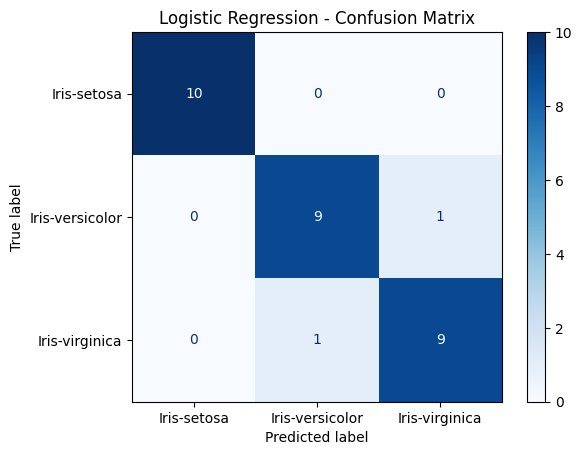


🔹 Logistic Regression - Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

def evaluate_and_plot(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Generate and display confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # Display classification report
    print(f"\n🔹 {model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate Logistic Regression
evaluate_and_plot(lr_model, X_test_scaled, y_test, "Logistic Regression")

Basic Hyperparameter Tunning

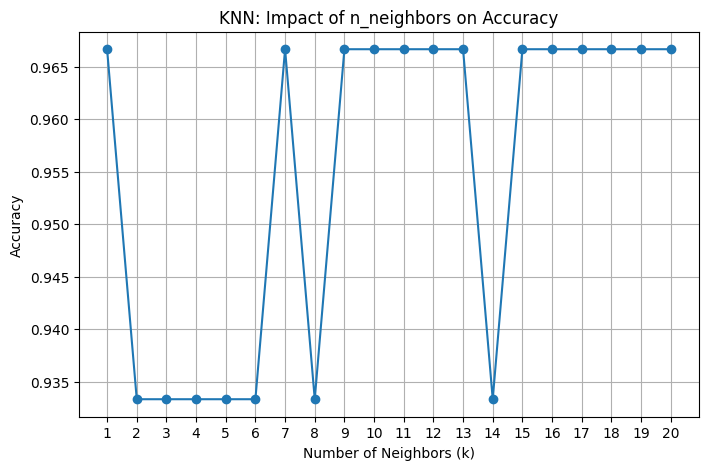

✅ Best k for KNN: 1 with Accuracy: 0.9667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

knn_neighbors = list(range(1, 21))
knn_accuracies = []

for k in knn_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
plt.figure(figsize=(8, 5))
plt.plot(knn_neighbors, knn_accuracies, marker='o')
plt.title("KNN: Impact of n_neighbors on Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(knn_neighbors)
plt.grid(True)
plt.show()

best_k = knn_neighbors[knn_accuracies.index(max(knn_accuracies))]
print(f"✅ Best k for KNN: {best_k} with Accuracy: {max(knn_accuracies):.4f}")

Use Scatter plots to visualize class separability

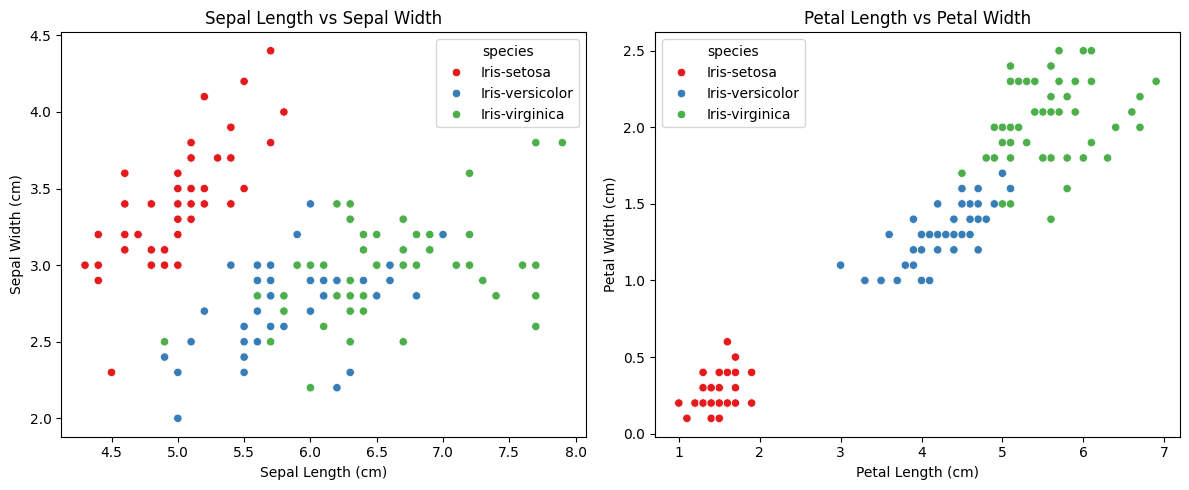

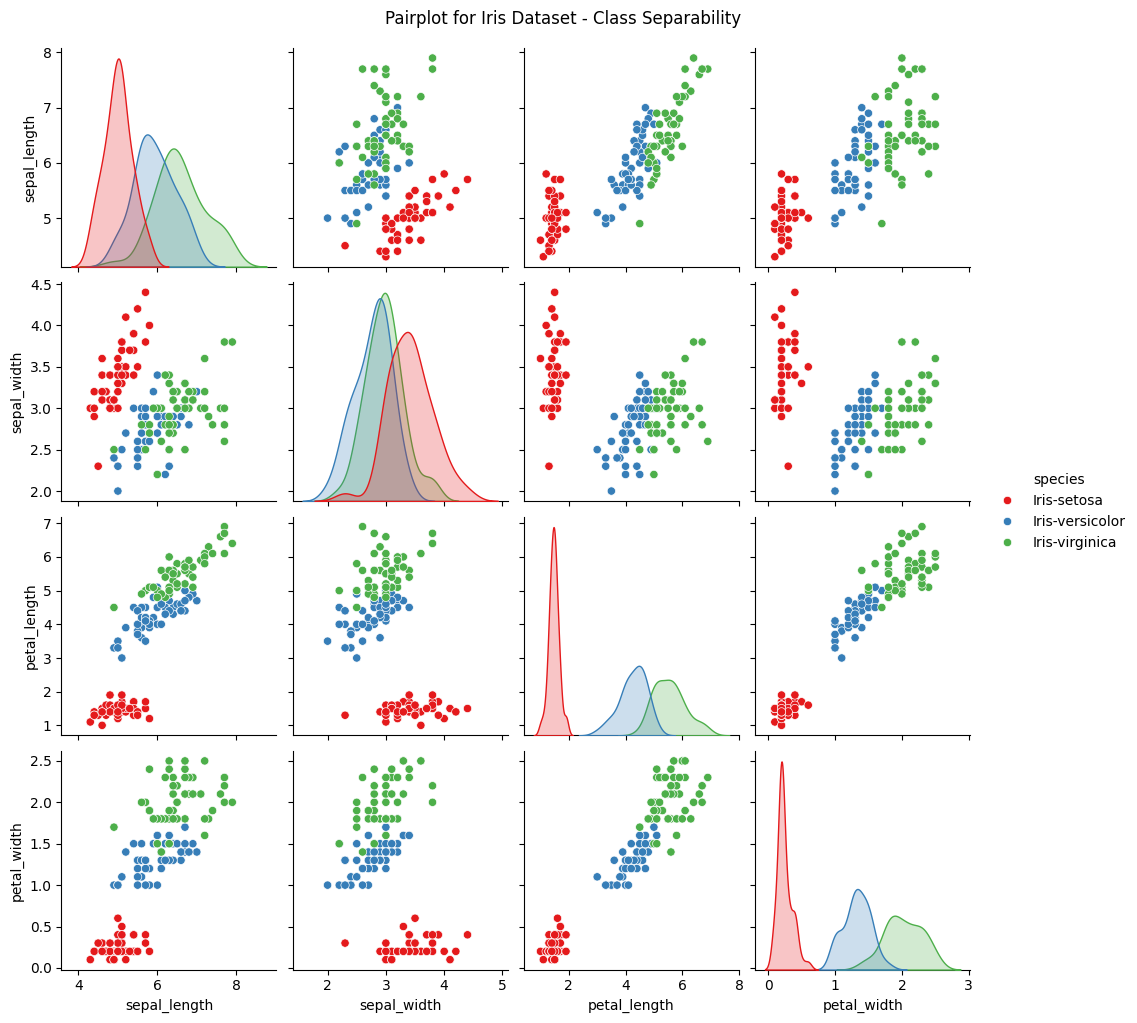

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

#Scatter: Sepal Length vs Sepal Width
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='sepal_length',
    y='sepal_width',
    hue='species',
    palette='Set1'
)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

#Scatter: Petal Length vs Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='petal_length',
    y='petal_width',
    hue='species',
    palette='Set1'
)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()

#Pairplot for all combinations
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle("Pairplot for Iris Dataset - Class Separability", y=1.02)
plt.show()

Plot the confusion matrix using heatmap

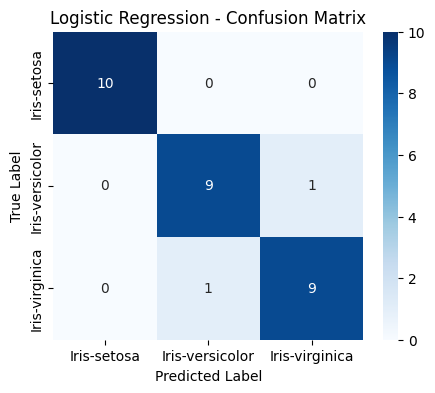

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix_heatmap(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Logistic Regression Confusion Matrix
plot_confusion_matrix_heatmap(lr_model, X_test_scaled, y_test, "Logistic Regression")

Try PCA to visualize the data in 2D

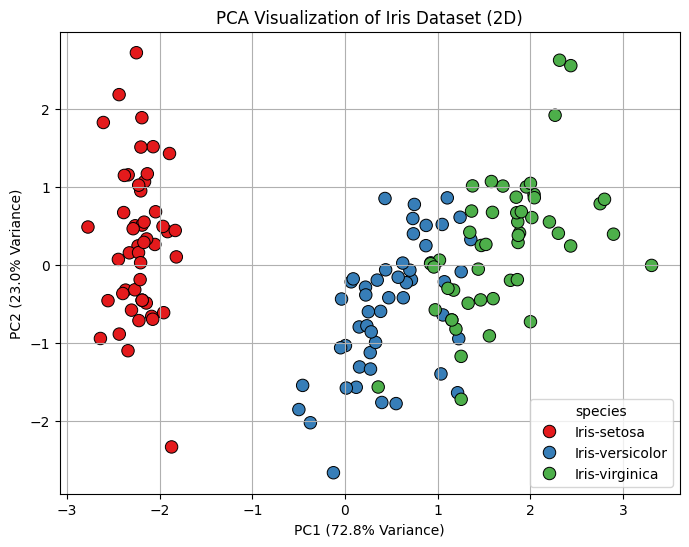

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X = df.drop('species', axis=1)
y = df['species']

#Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

#Plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='species',
    palette='Set1',
    s=80,
    edgecolor='black'
)
plt.title('PCA Visualization of Iris Dataset (2D)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)')
plt.grid(True)
plt.show()